In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import streamlit as st

In [35]:
# Load Dataset
filepath = r"C:\Users\Admin\Downloads\cropdata.csv"
def load_data(filepath):
    data = pd.read_csv(filepath,encoding='latin-1')
    return data

In [29]:
# Data Cleaning and Preprocessing

def clean_and_preprocess(data):
    data = data.dropna()
    data = data.drop_duplicates()
    data['Year'] = data['Year'].astype(int)
    return data

# def clean_and_preprocess(data):
#     # Standardize column names
#     data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

#     # Handling missing values
#     data = data.dropna(subset=['area_harvested', 'yield', 'production'])  # Drop rows where key values are missing
#     data.fillna({'year': data['year'].median()}, inplace=True)  # Fill missing years with median year

#     # Convert year column to integer
#     data['year'] = data['year'].astype(int)

#     # Remove duplicate rows
#     data = data.drop_duplicates()

#     # Convert categorical features (if needed)
#     if 'item' in data.columns:
#         data['item'] = data['item'].astype('category').cat.codes  # Encode crop types as numbers

#     return data

In [42]:
# Exploratory Data Analysis
def exploratory_analysis(data):
    # Dataset Overview
# You can display dataset information using print or similar methods, but in this case we assume 'data' is your DataFrame
    print("### Dataset Overview")
    # print(data.head())   # Uncomment to view dataset preview

    # Basic Statistics
    # print("### Basic Statistics")
    # print(data.describe())   # Uncomment to see summary statistics

    # Distribution of Crops
    print("### Distribution of Crops")
    crop_counts = data['Item'].value_counts()
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(y=crop_counts.index[:10], x=crop_counts.values[:10], palette="viridis", ax=ax)
    ax.set_title("Top 10 Most Cultivated Crops")
    plt.show()  # Use plt.show() to display the plot

    # Yearly Trends in Area Harvested, Yield, and Production
    print("### Yearly Trends")
    yearly_trends = data.groupby('Year')['Element'['Area harvested', 'Yield', 'Production']].sum()
    yearly_trends.plot(kind='line', figsize=(10, 5))
    plt.title("Yearly Trends in Area Harvested, Yield, and Production")
    plt.show()

    # Correlation Heatmap
    print("### Correlation Heatmap")
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.heatmap(data[['Area harvested', 'Yield', 'Production']].corr(), annot=True, cmap='coolwarm', ax=ax)
    plt.show()

    # Boxplots for Outlier Detection
    print("### Boxplot Analysis for Yield and Production")
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.boxplot(y=data['Yield'], ax=axes[0], color='lightblue')
    axes[0].set_title("Yield Distribution")
    sns.boxplot(y=data['Production'], ax=axes[1], color='lightgreen')
    axes[1].set_title("Production Distribution")
    plt.show()

    # Compare High-Yield vs. Low-Yield Crops
    print("### High-Yield vs. Low-Yield Crops")
    avg_yield_per_crop = data.groupby('Item')['Yield'].mean().sort_values(ascending=False)
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(y=avg_yield_per_crop.index[:10], x=avg_yield_per_crop.values[:10], palette="coolwarm", ax=ax)
    ax.set_title("Top 10 High-Yield Crops")
    plt.show()




    # if 'Production' in data.columns:
    #     yearly_trends = data.groupby('Year')[['Area harvested', 'Yield', 'Production']].sum()
    #     st.line_chart(yearly_trends)
        
    # print("Dataset Overview:\n", data.head())
    # print("Basic Statistics:\n", data.describe())

    # plt.figure(figsize=(12, 6))
    # sns.histplot(data['Element'], bins=30, kde=True)
    # plt.title("Distribution of Production")
    # plt.show()

    # plt.figure(figsize=(12, 6))
    # sns.boxplot(x='Year', y='Production', data=data)
    # plt.xticks(rotation=45)
    # plt.title("Production Trends Over Years")
    # plt.show()



    # 

In [31]:
def feature_selection(data):
    features = ['Area harvested', 'Yield', 'Year']
    target = 'Production'
    X = data[features]
    y = data[target]
    return X, y


In [32]:
# Model Training
def train_model(X_train, y_train):
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(random_state=42)
    }
    trained_models = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[name] = model
    return trained_models

# Model Evaluation
def evaluate_models(models, X_test, y_test):
    results = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}
    return results

### Dataset Overview
### Distribution of Crops


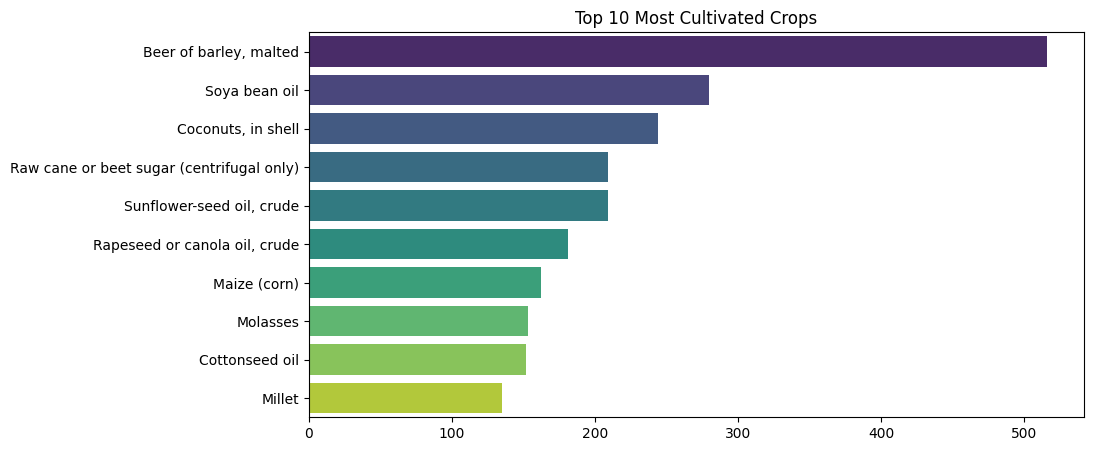

### Yearly Trends


KeyError: "Columns not found: 'Yield', 'Area harvested', 'Production'"

In [43]:
file_path = r"C:\Users\Admin\Downloads\cropdata.csv"  # Sample file path
data = load_data(file_path)
data = clean_and_preprocess(data)
exploratory_analysis(data)

X, y = feature_selection(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = train_model(X_train, y_train)
results = evaluate_models(models, X_test, y_test)

print("Model Evaluation Results:\n", pd.DataFrame(results).T)